In [2]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits


from matplotlib.ticker import NullFormatter  # useful for `logit` scale
from astropy.time import Time

from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

# wise

In [3]:
data_allwise_epoch=pd.read_csv('/Users/brettlv/Downloads/wise_cl/NGC1566_multi_epoch.csv')
data_neowise=pd.read_csv('/Users/brettlv/Downloads/wise_cl/NGC1566_neo.csv')

|  |$\Delta m$|
|  ----  | ----  |
|W1|  2.699|
|W2|  3.339|
|W3|  5.174|
|W4|  6.620|

In [4]:
delta_m_wise=[2.699,3.339,5.174,6.620]
delta_m_neowise=[2.699,3.339,2.699,3.339,5.174,6.620]

mjd w1mpro_ep w1sigmpro_ep 2.699
mjd w2mpro_ep w2sigmpro_ep 3.339
mjd w3mpro_ep w3sigmpro_ep 5.174
mjd w4mpro_ep w4sigmpro_ep 6.62
mjd w1mpro w1sigmpro 2.699
mjd w2mpro w2sigmpro 3.339
mjd w1mpro_allwise w1sigmpro_allwise 2.699
mjd w2mpro_allwise w2sigmpro_allwise 3.339
mjd w3mpro_allwise w3sigmpro_allwise 5.174
mjd w4mpro_allwise w4sigmpro_allwise 6.62


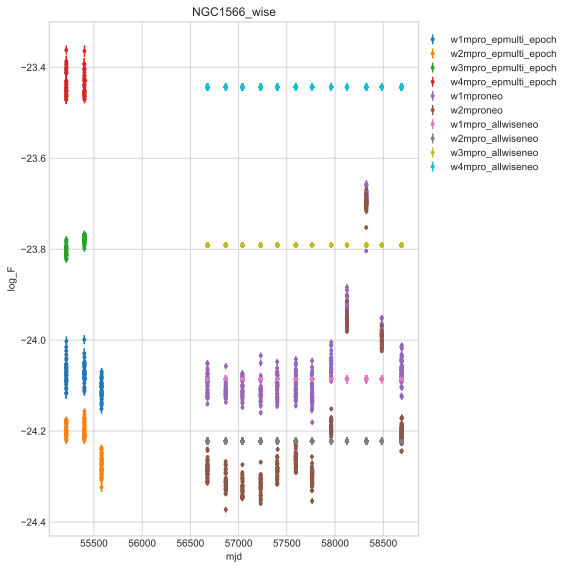

In [27]:
fig, axs = plt.subplots(1, 1,figsize=(8,8))
axs.set_title('NGC1566_wise')

for i in range(4):
    name_mjd='mjd'
    name_band=data_allwise_epoch.columns[i*3+8]
    name_err=data_allwise_epoch.columns[i*3+9]
    print(name_mjd,name_band,name_err,delta_m_wise[i])
    data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()]  
    #mag_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])    
    dcf_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':(-48.6-data_band[name_band]-delta_m_wise[i])/2.5,'err':data_band[name_err]/2.5},index=None,columns=['t','flux','err'])    
    axs.errorbar(dcf_wise_data['t'],dcf_wise_data['flux'],dcf_wise_data['err'],fmt='.',label=name_band+'multi_epoch')
    

data_neowise_select=data_neowise.loc[:, ['w1mpro', 'w1sigmpro',
         'w2mpro', 'w2sigmpro','w1mpro_allwise', 'w1sigmpro_allwise', 'w2mpro_allwise',
        'w2sigmpro_allwise', 'w3mpro_allwise', 'w3sigmpro_allwise',
        'w4mpro_allwise', 'w4sigmpro_allwise']]

for i in range(6):
    name_mjd='mjd'
    name_band=data_neowise_select.columns[i*2]
    name_err=data_neowise_select.columns[i*2+1]
    print(name_mjd,name_band,name_err,delta_m_neowise[i])
     
    #mag_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':data_neowise[name_band],'err':data_neowise[name_err]},index=None,columns=['t','flux','err'])   
    dcf_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':(-48.6-data_neowise[name_band]-delta_m_neowise[i])/2.5,'err':data_neowise[name_err]/2.5},index=None,columns=['t','flux','err'])
    axs.errorbar(dcf_neowise_data['t'],dcf_neowise_data['flux'],dcf_neowise_data['err'],fmt='.',label=name_band+'neo')
    
axs.legend(loc=[1.0,0.7])
#axs.invert_yaxis()
  
axs.set_ylabel('log_F')    
#axs.set_ylabel('magnitude(AB)')
axs.set_xlabel('mjd')
plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1566/wise_lc.png',dpi=400)

# XRT-fit

In [6]:
data_xrt_fit_NGC1566 = pd.read_table("/Users/brettlv/Downloads/wise_cl/xrt_fit_result/NGC1566_xrt_fit.txt",delimiter='\s+',header=0)  

/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  if __name__ == '__main__':


data_xrt_fit_NGC1566

# UVOT

In [7]:
data_ubb_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_ubb_sum.csv",delimiter='|',header=0)  
data_um2_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_um2_sum.csv",delimiter='|',header=0)  


data_uuu_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uuu_sum.csv",delimiter='|',header=0)  
data_uvv_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uvv_sum.csv",delimiter='|',header=0)  

data_uw1_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uw1_sum.csv",delimiter='|',header=0)  
data_uw2_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uw2_sum.csv",delimiter='|',header=0)  


               time                  mjy               mjy_err 


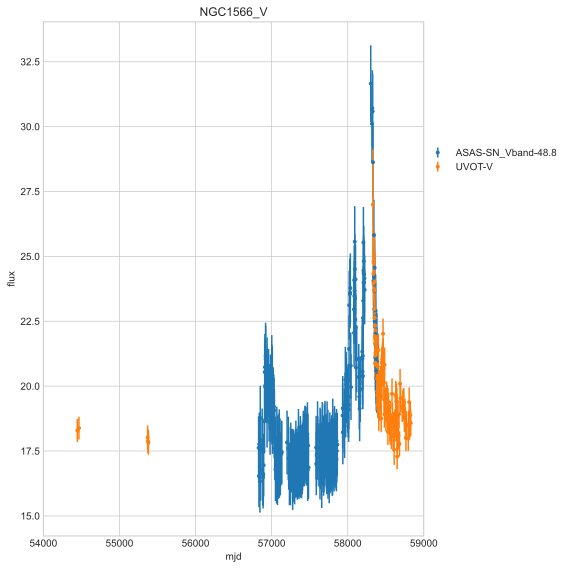

In [14]:
fig, axs = plt.subplots(1, 1,figsize=(8,8))
axs.set_title('NGC1566_V')

axs.errorbar(data_ASAS_NGC1566['hmjd'],data_ASAS_NGC1566['flux (mJy)']-48.8,data_ASAS_NGC1566['flux err'],fmt='.',label='ASAS-SN_Vband-48.8') 
dcf_ASAS_data=pd.DataFrame({'t':data_ASAS_NGC1566['hmjd'],'flux':data_ASAS_NGC1566['flux (mJy)'],'err':data_ASAS_NGC1566['flux err']},index=None,columns=['t','flux','err'])    
dcf_ASAS_data=dcf_ASAS_data.sort_values('t')

j=data_uvv_NGC1566
print(j.columns[3],j.columns[6],j.columns[7])
axs.errorbar(j[j.columns[3]],j[j.columns[6]],yerr=j[j.columns[7]],fmt='.',label='UVOT-V')
dcf_data_uv=pd.DataFrame({'t':j[j.columns[3]],'flux':j[j.columns[6]],'err':j[j.columns[7]]},index=None,columns=['t','flux','err'])
dcf_data_uv=dcf_data_uv.sort_values('t')

timerangel,timeranger=(54000,59000)
axs.set_xlim(timerangel,timeranger)
axs.legend(loc=[1.0,0.7])
axs.set_ylabel('flux')
axs.set_xlabel('mjd')
plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1566/V-band.png',dpi=400)

In [16]:
def get_simultaneous_data(dcf_ASAS_data,dcf_data_uv,timebin=0.1):
    xf=[]
    uf=[]
    xt=[]
    ut=[]
    uferr=[]
    for i,i_ in zip(dcf_ASAS_data['t'],dcf_ASAS_data['flux']):
        if i<59000:
            for j,j_ in zip(dcf_data_uv['t'],dcf_data_uv['flux']):
                if (i-j)<=timebin and (i-j)>0:
                    uf.append(i_)
                    xf.append(j_)
                    ut.append(i)
                    xt.append(j)
                    
    return xf,uf,xt,ut
uv_f,asas_f,uv_t,asas_t =get_simultaneous_data(dcf_ASAS_data,dcf_data_uv,timebin=0.5)

In [17]:
sum=0
for i,j in zip(asas_f,uv_f):
    sum=sum+i-j
    
    print(i-j)

49.60818614196778
50.07856706237793
48.45057287597656
47.611887802124016
50.21324668884277
48.18163768005371
48.54671293640136
47.79643322753907


In [18]:
sum/len(asas_f)

48.8109055519104

In [19]:
UV_namelist=['v','b','u','uvw1','uvm2','uvw2']
UV_datalist=[data_uvv_NGC1566,data_ubb_NGC1566,data_uuu_NGC1566,data_uw1_NGC1566,data_um2_NGC1566,data_uw2_NGC1566  ]

In [ ]:
## Swift

In [20]:
data_xrt_fit_NGC1566.columns

Index(['obs_id', 'obs_time', 'gamma', 'gamma_lo', 'gamma_up', 'xflux',
       'xflux_lo', 'xflux_up', 'chi'],
      dtype='object')

In [21]:
data_ubb_NGC1566.columns

Index(['Unnamed: 0', '       obsid ', ' filter ', '               time ',
       '                mag ', '              mag_err ',
       '                mjy ', '             mjy_err ', '               rate ',
       '           rate_err ', 'Unnamed: 10'],
      dtype='object')

## F-gamma

<ErrorbarContainer object of 3 artists>

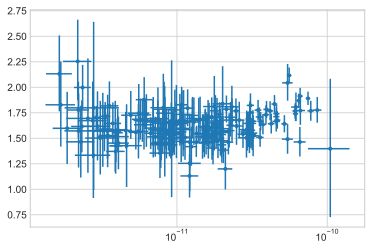

In [22]:
lower_error_f = data_xrt_fit_NGC1566['xflux_lo']
upper_error_f = data_xrt_fit_NGC1566['xflux_up']
lower_error_g = data_xrt_fit_NGC1566['gamma_lo']
upper_error_g = data_xrt_fit_NGC1566['gamma_up']
asymmetric_error_f = [lower_error_f, upper_error_f]
asymmetric_error_g = [lower_error_g, upper_error_g]
plt.semilogx()
plt.errorbar(data_xrt_fit_NGC1566['xflux'],data_xrt_fit_NGC1566['gamma'],xerr=asymmetric_error_f,yerr=asymmetric_error_g,fmt='.',label='F-gamma') 

In [29]:
data_rebin_neowise_w1=pd.read_csv('/Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w1.csv',header=None)
data_rebin_neowise_w2=pd.read_csv('/Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w2.csv',header=None)

# XRT-count

In [20]:
data_xrt_pc_NGC1566 = pd.read_table("/Users/brettlv/Downloads/NGC1566/PC.qdp.txt",delimiter='\s+',header=0)  
data_xrt_wt_NGC1566 = pd.read_table("/Users/brettlv/Downloads/NGC1566/WT.qdp.txt",delimiter='\s+',header=0)  

/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  if __name__ == '__main__':
/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  from ipykernel import kernelapp as app


In [21]:
data_xrt_pc_NGC1566

mjd   TERRpos   TERRneg      Rate   Ratepos   Rateneg
0     54446.286970  0.000579 -0.000579  0.275820  0.055708 -0.055708
1     54446.288127  0.000579 -0.000579  0.446687  0.079164 -0.079164
2     54446.289285  0.000579 -0.000579  0.225239  0.072815 -0.059987
3     54446.290442  0.000579 -0.000579  0.347709  0.067253 -0.067253
4     54446.291599  0.000579 -0.000579  0.499458  0.093174 -0.093174
5     54446.292757  0.000579 -0.000579  0.246396  0.076461 -0.063464
6     54446.293914  0.000579 -0.000579  0.359814  0.082895 -0.082895
7     54446.295072  0.000579 -0.000579  0.146856  0.064324 -0.049850
8     54446.354099  0.000579 -0.000579  0.282593  0.062311 -0.062311
9     54446.355257  0.000579 -0.000579  0.307649  0.058595 -0.058595
10    54446.356414  0.000579 -0.000579  0.218664  0.049296 -0.049296
11    54446.357572  0.000579 -0.000579  0.252868  0.052977 -0.052977
12    54446.358729  0.000579 -0.000579  0.283527  0.056951 -0.056951
13    54446.359886  0.000579 -0.000579  0.302335  0.075836 -0.075836
14    54446.361044  0.000579 -0.000579  0.421675  0.081476 -0.081476
15    54446.362201  0.000579 -0.000579  0.414426  0.249173 -0.177270
16    54446.420072  0.000579 -0.000579  0.241270  0.127005 -0.093806
17    54446.421229  0.000579 -0.000579  0.344957  0.062174 -0.062174
18    54446.422386  0.000579 -0.000579  0.298267  0.057517 -0.057517
19    54446.423544  0.000579 -0.000579  0.329833  0.060548 -0.060548
20    54446.424701  0.000579 -0.000579  0.285515  0.056170 -0.056170
21    54446.425859  0.000579 -0.000579  0.355041  0.062870 -0.062870
22    54446.427016  0.000579 -0.000579  0.345423  0.062258 -0.062258
23    54446.428173  0.000579 -0.000579  0.354844  0.074518 -0.074518
24    54467.518451  0.000579 -0.000579  0.458228  0.135294 -0.113052
25    54467.519608  0.000579 -0.000579  0.544050  0.103179 -0.103179
26    54467.520765  0.000579 -0.000579  0.415969  0.091200 -0.091200
27    54467.521923  0.000579 -0.000579  0.427553  0.091462 -0.091462
28    54467.523080  0.000579 -0.000579  0.422135  0.076001 -0.076001
29    54467.524238  0.000579 -0.000579  0.416700  0.101504 -0.101504
...            ...       ...       ...       ...       ...       ...
1968  58961.206850  0.000579 -0.000579  0.328685  0.111525 -0.091045
1969  58975.229997  0.000579 -0.000579  0.291339  0.176314 -0.125436
1970  58975.231154  0.000579 -0.000579  0.266514  0.054829 -0.054829
1971  58975.232311  0.000579 -0.000579  0.396296  0.069210 -0.069210
1972  58975.292497  0.000579 -0.000579  0.319017  0.075649 -0.075649
1973  58975.293654  0.000579 -0.000579  0.252884  0.052855 -0.052855
1974  58975.294811  0.000579 -0.000579  0.295711  0.057488 -0.057488
1975  58975.295969  0.000579 -0.000579  0.296051  0.057263 -0.057263
1976  58975.297126  0.000579 -0.000579  0.296043  0.057261 -0.057261
1977  58975.298284  0.000579 -0.000579  0.262413  0.053992 -0.053992
1978  58975.299441  0.000579 -0.000579  0.273123  0.195738 -0.131828
1979  58989.226523  0.000579 -0.000579  0.537327  0.284728 -0.210301
1980  58989.227681  0.000579 -0.000579  0.778618  0.126755 -0.126755
1981  58989.228838  0.000579 -0.000579  0.612463  0.113863 -0.113863
1982  58989.229995  0.000579 -0.000579  0.498665  0.103083 -0.103083
1983  58989.231153  0.000579 -0.000579  0.668549  0.118930 -0.118930
1984  58989.232310  0.000579 -0.000579  0.475693  0.090878 -0.090878
1985  58989.233468  0.000579 -0.000579  0.464192  0.244350 -0.180478
1986  59003.039022  0.000579 -0.000579  1.730175  0.910764 -0.672692
1987  59003.040180  0.000579 -0.000579  0.901939  0.169010 -0.169010
1988  59003.041337  0.000579 -0.000579  0.957157  0.174433 -0.174433
1989  59003.042494  0.000579 -0.000579  0.700693  0.148028 -0.148028
1990  59003.043652  0.000579 -0.000579  0.861918  0.164645 -0.164645
1991  59003.044809  0.000579 -0.000579  0.832265  0.161736 -0.161736
1992  59003.045967  0.000579 -0.000579  0.774704  0.155873 -0.155873
1993  59003.047124  0.000579 -0.000579  0.795784  0.158341 -0.158341
1994  59003.0

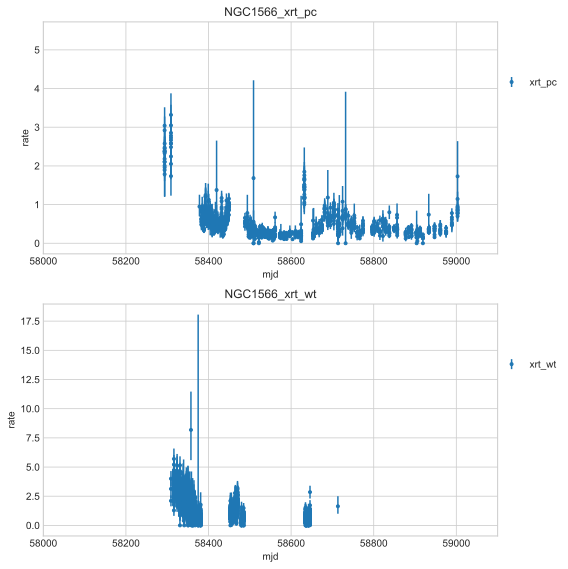

In [30]:
fig, axs = plt.subplots(2, 1,figsize=(8,8))
axs[0].set_title('NGC1566_xrt_pc')
axs[1].set_title('NGC1566_xrt_wt')


name_band_pc='xrt_pc'
name_band_wt='xrt_wt'

lower_error_pc = -data_xrt_pc_NGC1566['Rateneg']
upper_error_pc = data_xrt_pc_NGC1566['Ratepos']
asymmetric_error_pc = [lower_error_pc, upper_error_pc]
axs[0].errorbar(data_xrt_pc_NGC1566['mjd'],data_xrt_pc_NGC1566['Rate'],yerr=asymmetric_error_pc,fmt='.',label=name_band_pc)


lower_error_wt = -data_xrt_wt_NGC1566['Rateneg']
upper_error_wt = data_xrt_wt_NGC1566['Ratepos']
asymmetric_error_wt = [lower_error_wt, upper_error_wt]
axs[1].errorbar(data_xrt_wt_NGC1566['mjd'],data_xrt_wt_NGC1566['Rate'],yerr=asymmetric_error_wt,fmt='.',label=name_band_wt)


timerangel,timeranger=(58000,59100)
axs[0].set_xlim(timerangel,timeranger)
axs[1].set_xlim(timerangel,timeranger)

axs[0].legend(loc=[1.0,0.7])
axs[1].legend(loc=[1.0,0.7])
  
axs[0].set_ylabel('rate')
axs[0].set_xlabel('mjd')
axs[1].set_ylabel('rate')
axs[1].set_xlabel('mjd')
  

plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1566/xrt_lc%d-%d.png'%(timerangel,timeranger),dpi=400)


# ASAS-SN

In [9]:
data_ASAS_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/NGC1566/AP36757554_ASASSN-V J042000.52-545616.7 (65.00215, -54.93797) .csv",header=0)  

In [10]:
data_ASAS_NGC1566['hmjd']= data_ASAS_NGC1566['hjd']- 2400000.5

In [11]:
data_ASAS_NGC1566.columns

Index(['hjd', 'camera', 'filter', 'mag', 'mag err', 'flux (mJy)', 'flux err',
       'hmjd'],
      dtype='object')

data_ASAS_NGC1566

<ErrorbarContainer object of 3 artists>

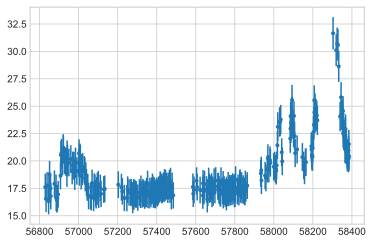

In [12]:
plt.errorbar(data_ASAS_NGC1566['hmjd'],data_ASAS_NGC1566['flux (mJy)']-48.8,data_ASAS_NGC1566['flux err'],fmt='.',label='ASAS-SN_Vband-48.8') 

<ErrorbarContainer object of 3 artists>

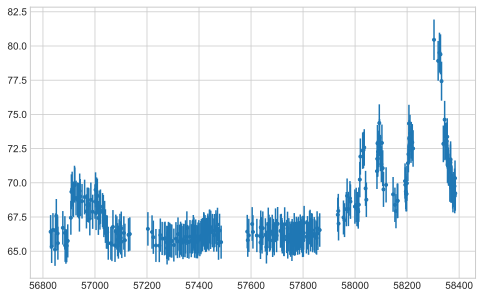

In [13]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
axs.errorbar(data_ASAS_NGC1566['hmjd'],data_ASAS_NGC1566['flux (mJy)'],data_ASAS_NGC1566['flux err'],fmt='.',label='ASAS-SN_Vband') 


# XRT-f-g-UVOT-V-wise

mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w3mpro_ep w3sigmpro_ep
mjd w4mpro_ep w4sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
mjd w1mpro_allwise w1sigmpro_allwise
mjd w2mpro_allwise w2sigmpro_allwise
mjd w3mpro_allwise w3sigmpro_allwise
mjd w4mpro_allwise w4sigmpro_allwise
               time                  mjy               mjy_err 
               time                  mjy               mjy_err 
               time                  mjy               mjy_err 
               time                  mjy                mjy_err 
               time                   mjy                mjy_err 
               time                   mjy                mjy_err 


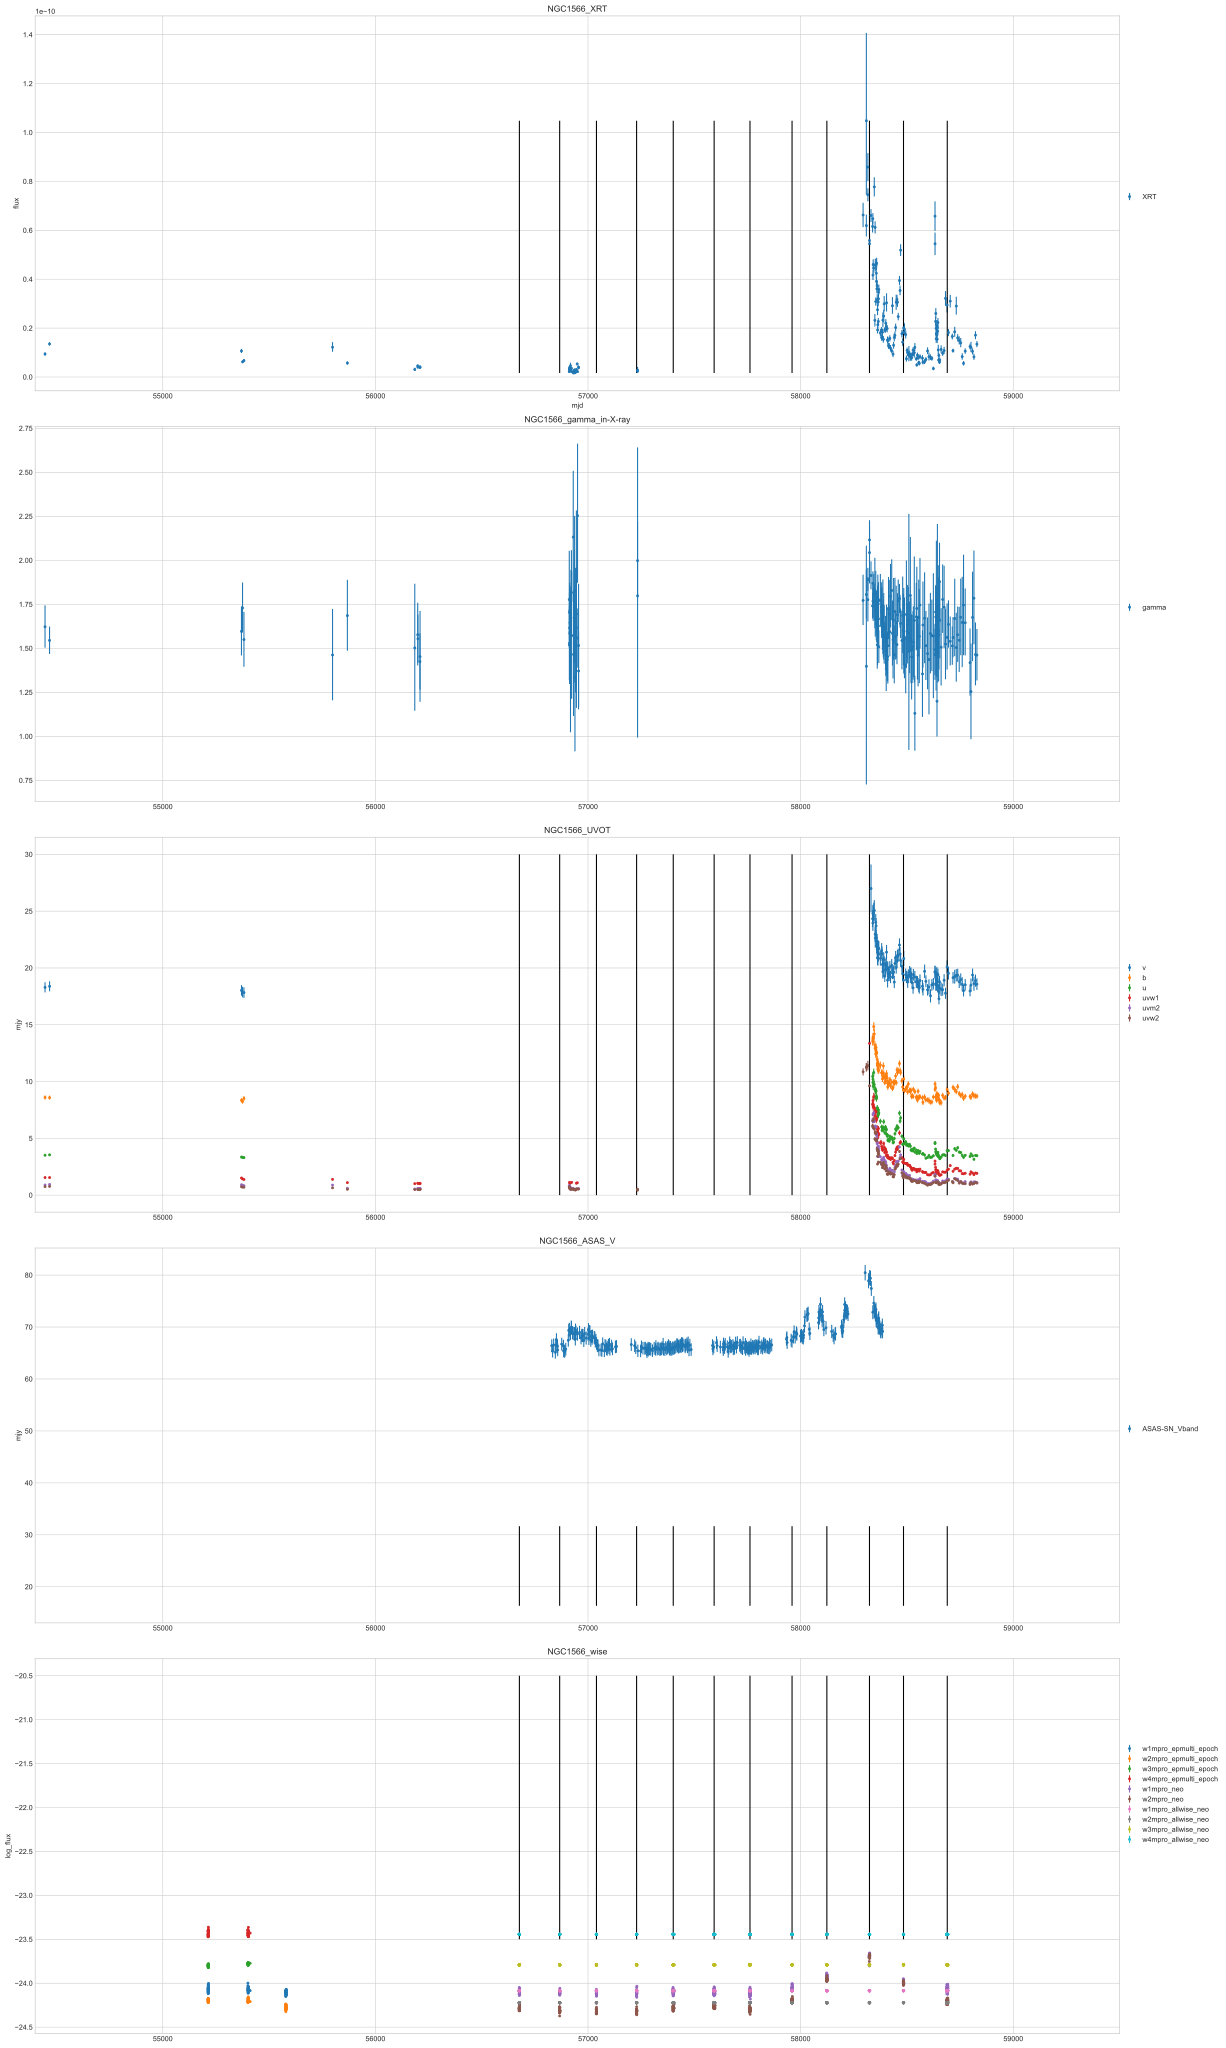

In [30]:
fig, axs = plt.subplots(5, 1,figsize=(24,40))

axs[0].set_title('NGC1566_XRT')
axs[1].set_title('NGC1566_gamma_in-X-ray')
axs[2].set_title('NGC1566_UVOT')
axs[3].set_title('NGC1566_ASAS_V')
axs[4].set_title('NGC1566_wise')

axs[3].errorbar(data_ASAS_NGC1566['hmjd'],data_ASAS_NGC1566['flux (mJy)'],data_ASAS_NGC1566['flux err'],fmt='.',label='ASAS-SN_Vband') 
dcf_ASAS_data=pd.DataFrame({'t':data_ASAS_NGC1566['hmjd'],'flux':data_ASAS_NGC1566['flux (mJy)']-48.8,'err':data_ASAS_NGC1566['flux err']},index=None,columns=['t','flux','err'])    
dcf_ASAS_data=dcf_ASAS_data.sort_values('t')
dcf_ASAS_data.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_ASAS_V_data.csv',index=False,header=False)



for i in range(4):
    name_mjd='mjd'
    name_band=data_allwise_epoch.columns[i*3+8]
    name_err=data_allwise_epoch.columns[i*3+9]
    print(name_mjd,name_band,name_err)
    data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()]  
    #mag_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])    
    dcf_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':(-48.6-data_band[name_band]-delta_m_wise[i])/2.5,'err':data_band[name_err]/2.5},index=None,columns=['t','flux','err'])   
    axs[4].errorbar(dcf_wise_data['t'],dcf_wise_data['flux'],dcf_wise_data['err'],fmt='.',label=name_band+'multi_epoch')
    dcf_wise_data=dcf_wise_data.sort_values('t')
    dcf_wise_data.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_wise_multi_%s_data.csv'%name_band,index=False,header=False)    
   
    
data_neowise_select=data_neowise.loc[:, ['w1mpro', 'w1sigmpro',
         'w2mpro', 'w2sigmpro','w1mpro_allwise', 'w1sigmpro_allwise', 'w2mpro_allwise',
        'w2sigmpro_allwise', 'w3mpro_allwise', 'w3sigmpro_allwise',
        'w4mpro_allwise', 'w4sigmpro_allwise']]

for i in range(6):
    name_mjd='mjd'
    name_band=data_neowise_select.columns[i*2]
    name_err=data_neowise_select.columns[i*2+1]
    print(name_mjd,name_band,name_err)
    #mag_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':data_neowise[name_band],'err':data_neowise[name_err]},index=None,columns=['t','flux','err'])   
    dcf_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':(-48.6-data_neowise[name_band]-delta_m_neowise[i])/2.5,'err':data_neowise[name_err]/2.5},index=None,columns=['t','flux','err'])

    axs[4].errorbar(dcf_neowise_data['t'],dcf_neowise_data['flux'],dcf_neowise_data['err'],fmt='.',label=name_band+'_neo') 
    dcf_neowise_data=dcf_neowise_data.sort_values('t')
    dcf_neowise_data.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_neowise_%s_data.csv'%name_band,index=False,header=False)
    
    

lower_error = data_xrt_fit_NGC1566['xflux_lo']
upper_error = data_xrt_fit_NGC1566['xflux_up']
asymmetric_error = [lower_error, upper_error]
axs[0].errorbar(data_xrt_fit_NGC1566['obs_time'],data_xrt_fit_NGC1566['xflux'],yerr=asymmetric_error,fmt='.',label='XRT')

dcf_data_xrt_fit_NGC1566=pd.DataFrame({'t':data_xrt_fit_NGC1566['obs_time'],'flux':data_xrt_fit_NGC1566['xflux'],'err':data_xrt_fit_NGC1566['xflux_lo']},index=None,columns=['t','flux','err'])
dcf_data_xrt_fit_NGC1566=dcf_data_xrt_fit_NGC1566.sort_values('t')
dcf_data_xrt_fit_NGC1566.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_xrt_fit_NGC1566.csv',index=False,header=False)

dcf_data_xrt_fit_NGC1566_e12=pd.DataFrame({'t':data_xrt_fit_NGC1566['obs_time'],'flux':data_xrt_fit_NGC1566['xflux']*1.0e12,'err':data_xrt_fit_NGC1566['xflux_lo']*1.0e12},index=None,columns=['t','flux','err'])
dcf_data_xrt_fit_NGC1566_e12=dcf_data_xrt_fit_NGC1566_e12.sort_values('t')
dcf_data_xrt_fit_NGC1566_e12.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_e12_xrt_fit_NGC1566.csv',index=False,header=False)



lower_error = data_xrt_fit_NGC1566['gamma_lo']
upper_error = data_xrt_fit_NGC1566['gamma_up']
asymmetric_error = [lower_error, upper_error]
axs[1].errorbar(data_xrt_fit_NGC1566['obs_time'],data_xrt_fit_NGC1566['gamma'],yerr=asymmetric_error,fmt='.',label='gamma')

for i,j in zip(UV_namelist,UV_datalist):
    print(j.columns[3],j.columns[6],j.columns[7])
    axs[2].errorbar(j[j.columns[3]],j[j.columns[6]],yerr=j[j.columns[7]],fmt='.',label=i)
    dcf_data_uv=pd.DataFrame({'t':j[j.columns[3]],'flux':j[j.columns[6]],'err':j[j.columns[7]]},index=None,columns=['t','flux','err'])
    dcf_data_uv=dcf_data_uv.sort_values('t')
    dcf_data_uv.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_uvot-%s.csv'%i,index=False,header=False)

for i in data_rebin_neowise_w1[0]:
    axs[0].vlines(i,min(dcf_data_xrt_fit_NGC1566['flux']),max(dcf_data_xrt_fit_NGC1566['flux']))
for i in data_rebin_neowise_w1[0]:
    axs[2].vlines(i,0,30)    
for i in data_rebin_neowise_w1[0]:
    axs[3].vlines(i,min(dcf_ASAS_data['flux']),max(dcf_ASAS_data['flux']))
for i in data_rebin_neowise_w1[0]:
    axs[4].vlines(i,-23.5,-20.5)
    

        
    
    
timerangel,timeranger=(54400,59500)
for i in range(5):
    axs[i].set_xlim(timerangel,timeranger)
    axs[i].legend(loc=[1.0,0.5])
    
    
#
axs[0].set_ylabel('flux')
axs[2].set_ylabel('mjy')
axs[3].set_ylabel('mjy')
axs[4].set_ylabel('log_flux')
#axs[4].invert_yaxis()

axs[0].set_xlabel('mjd')




plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1566/XRT-UVOT-ASASV_lc%d-%d.png'%(timerangel,timeranger),dpi=400)



 

# dcf

In [157]:
ls example/*.csv

example/dcf_t1.csv  example/dcf_t2.csv  example/ts1.csv     example/ts2.csv


In [158]:
pwd

'/Users/brettlv/timing_analysis/pydcf'

In [47]:
ls /Users/brettlv/Downloads/NGC1566/dcf*.csv > /Users/brettlv/Downloads/NGC1566/dcf_ngc1566.txt

In [48]:
dcf_lists=[]
with open ('/Users/brettlv/Downloads/NGC1566/dcf_ngc1566.txt','r') as f:
    dcf_list=f.readlines()
    for line in dcf_list:
        dcf_lists.append(line.rstrip('\n')) 

In [49]:
for i,j in enumerate(dcf_lists):
    print(i,j.split('/')[-1][4:-4])

0 ASAS_V_data
1 e12_xrt_fit_NGC1566
2 neowise_w1mpro_allwise_data
3 neowise_w1mpro_data
4 neowise_w2mpro_allwise_data
5 neowise_w2mpro_data
6 neowise_w3mpro_allwise_data
7 neowise_w4mpro_allwise_data
8 uvot-ubb
9 uvot-um2
10 uvot-uuu
11 uvot-uvv
12 uvot-uw1
13 uvot-uw2
14 wise_multi_w1mpro_ep_data
15 wise_multi_w2mpro_ep_data
16 wise_multi_w3mpro_ep_data
17 wise_multi_w4mpro_ep_data
18 xrt_fit_NGC1566


In [38]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode'

In [39]:
import os 
os.chdir('/Users/brettlv/timing_analysis/pydcf')


def get_data(path):    
    data=pd.read_csv(path,header=None)
    return data

def get_min_max(data):
    return min(data[0]),max(data[1])

def get_lc_data(data):    
    t1,dy1,y_obs1= (data[0],data[2],data[1]) 
    return t1,dy1,y_obs1

def get_new_range_data(t,dy,y_obs,rangemin,rangemax):
    
    t1new,dy1new,y_obs1new=t[t>=rangemin],dy[t>=rangemin],y_obs[t>=rangemin]
    t2new,dy2new,y_obs2new=t1new[t<=rangemax],dy1new[t<=rangemax],y_obs1new[t<=rangemax]   
    return t2new,dy2new,y_obs2new

def get_mean_interval(t):
    return int(np.max(t)-np.min(t))/(len(t)-1)

def get_interval(t):
    return int(np.max(t)-np.min(t))


def get_name(m,n,dcf_lists):
    path1=dcf_lists[m]
    path2=dcf_lists[n]    
    newpath1=path1.split('/')[-1][4:-4]
    newpath2=path2.split('/')[-1][4:-4]
    newfile1='/Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_%s_%s.csv'%(newpath1,newpath2)
    newfile2='/Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_%s_%s.csv'%(newpath2,newpath1)  
    return newpath1,newpath2,newfile1,newfile2

def get_new_range_datas(m,n,dcf_lists,rangemin,rangemax):
    path1=dcf_lists[m]
    path2=dcf_lists[n] 
    data1=get_data(path1)
    t1,dy1,y_obs1=get_lc_data(data1)
    t1new,dy1new,y_obs1new=get_new_range_data(t1,dy1,y_obs1,rangemin,rangemax)
    data2=get_data(path2)
    t2,dy2,y_obs2=get_lc_data(data2)   
    t2new,dy2new,y_obs2new=get_new_range_data(t2,dy2,y_obs2,rangemin,rangemax) 
    return t1new,dy1new,y_obs1new,t2new,dy2new,y_obs2new

def write_dcf_data(m,n,dcf_lists,rangemin,rangemax):     
    newpath1,newpath2,newfile1,newfile2=get_name(m,n,dcf_lists)
    t1new,dy1new,y_obs1new,t2new,dy2new,y_obs2new=get_new_range_datas(m,n,dcf_lists,rangemin,rangemax)
    dcf_data_write1=pd.DataFrame({'t':t1new,'flux':y_obs1new,'err':dy1new},index=None,columns=['t','flux','err'])
    dcf_data_write1.to_csv(newfile1,index=False,header=False)
    dcf_data_write2=pd.DataFrame({'t':t2new,'flux':y_obs2new,'err':dy2new},index=None,columns=['t','flux','err'])
    dcf_data_write2.to_csv(newfile2,index=False,header=False)
    

def get_time_lag_two_series_gauss(m,n,dcf_lists,rangemin=0,rangemax=60000,p=2):     
    newpath1,newpath2,newfile1,newfile2=get_name(m,n,dcf_lists)
    t1new,dy1new,y_obs1new,t2new,dy2new,y_obs2new=get_new_range_datas(m,n,dcf_lists,rangemin,rangemax)
    print(newpath1,newpath2,newfile1,newfile2)
    dt_width=min(get_mean_interval(t1new),get_mean_interval(t2new))*10
    lh_length=min(get_interval(t1new),get_interval(t2new))*0.5
    print(get_mean_interval(t1new),get_mean_interval(t2new))
    write_dcf_data(m,n,dcf_lists,rangemin,rangemax)
    command='python3 dcf_test.py %s %s %d %d %d %d %d -w=gauss -p=%d -o '%(newfile1,newfile2,-lh_length,lh_length,dt_width,rangemin,rangemax,p)
    print(command)  
    os.system(command)
def get_time_lag_two_series_slot(m,n,dcf_lists,rangemin=0,rangemax=60000,p=2):     
    newpath1,newpath2,newfile1,newfile2=get_name(m,n,dcf_lists)
    t1new,dy1new,y_obs1new,t2new,dy2new,y_obs2new=get_new_range_datas(m,n,dcf_lists,rangemin,rangemax)
    print(newpath1,newpath2,newfile1,newfile2)
    dt_width=min(get_mean_interval(t1new),get_mean_interval(t2new))*10
    lh_length=min(get_interval(t1new),get_interval(t2new))*0.5
    print(get_mean_interval(t1new),get_mean_interval(t2new))
    write_dcf_data(m,n,dcf_lists,rangemin,rangemax)
    command='python3 dcf_test.py %s %s %d %d %d %d %d -w=slot -p=%d -o '%(newfile1,newfile2,-lh_length,lh_length,dt_width,rangemin,rangemax,p)
    print(command)  
    os.system(command)        
    
    
def get_time_lag_two_series_gauss_specific(m,n,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width,p=2):     
    newpath1,newpath2,newfile1,newfile2=get_name(m,n,dcf_lists)
    t1new,dy1new,y_obs1new,t2new,dy2new,y_obs2new=get_new_range_datas(m,n,dcf_lists,rangemin,rangemax)
    print('mean interval: ',newpath1,get_mean_interval(t1new))        
    print('mean interval: ',newpath2,get_mean_interval(t2new))
    print('timerange:',rangemin,'-',rangemax)
    print('lag_range:',l_length,'-',h_length)
    print('dT:',dt_width)
    
    
    #(newfile1,newfile2)
    #dt_width=min(get_mean_interval(t1new),get_mean_interval(t2new))*10
    #lh_length=min(get_interval(t1new),get_interval(t2new))*0.5
    #print(get_mean_interval(t1new),get_mean_interval(t2new))
    write_dcf_data(m,n,dcf_lists,rangemin,rangemax)
    command='python3 dcf_test.py %s %s %d %d %d %d %d -w=gauss -p=%d -o '%(newfile1,newfile2,l_length,h_length,dt_width,rangemin,rangemax,p)
    print(command)
    os.system(command)
    
def get_time_lag_two_series_slot_specific(m,n,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width,p=2):     
    newpath1,newpath2,newfile1,newfile2=get_name(m,n,dcf_lists)
    t1new,dy1new,y_obs1new,t2new,dy2new,y_obs2new=get_new_range_datas(m,n,dcf_lists,rangemin,rangemax)
    print('mean interval: ',newpath1,get_mean_interval(t1new))        
    print('mean interval: ',newpath2,get_mean_interval(t2new))
    print('timerange:',rangemin,'-',rangemax)
    print('lag_range:',l_length,'-',h_length)
    print('dT:',dt_width)
    
    
    #(newfile1,newfile2)
    #dt_width=min(get_mean_interval(t1new),get_mean_interval(t2new))*10
    #lh_length=min(get_interval(t1new),get_interval(t2new))*0.5
    #print(get_mean_interval(t1new),get_mean_interval(t2new))
    write_dcf_data(m,n,dcf_lists,rangemin,rangemax)
    command='python3 dcf_test.py %s %s %d %d %d %d %d -w=slot -p=%d -o '%(newfile1,newfile2,l_length,h_length,dt_width,rangemin,rangemax,p)
    print(command)
    os.system(command)    
    
        
    

In [51]:
def finish_default(m,n,dcf_lists):
    for i in range(3):
        get_time_lag_two_series_gauss(m,n,dcf_lists,p=i)
        get_time_lag_two_series_slot(m,n,dcf_lists,p=i)

def finish_specific(m,n,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width):
    for i in range(3):
        get_time_lag_two_series_gauss_specific(m,n,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width,p=i)     
        get_time_lag_two_series_slot_specific(m,n,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width,p=i)     
   
        
        

In [41]:
pwd

'/Users/brettlv/timing_analysis/pydcf'

In [50]:
get_time_lag_two_series_gauss(1,0,dcf_lists,rangemin=0,rangemax=60000,p=2)

e12_xrt_fit_NGC1566 ASAS_V_data /Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_e12_xrt_fit_NGC1566_ASAS_V_data.csv /Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_ASAS_V_data_e12_xrt_fit_NGC1566.csv
23.815217391304348 4.936507936507937
python3 dcf_test.py /Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_e12_xrt_fit_NGC1566_ASAS_V_data.csv /Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_ASAS_V_data_e12_xrt_fit_NGC1566.csv -777 777 49 0 60000 -w=gauss -p=2 -o 


In [55]:
get_time_lag_two_series_gauss_specific(1,0,dcf_lists,56800,59000,-100,100,1.0,p=2)    

mean interval:  e12_xrt_fit_NGC1566 11.145348837209303
mean interval:  ASAS_V_data 4.936507936507937
timerange: 56800 - 59000
lag_range: -100 - 100
dT: 1.0
python3 dcf_test.py /Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_e12_xrt_fit_NGC1566_ASAS_V_data.csv /Users/brettlv/timing_analysis/pydcf/ngc1566/dcf_new_ASAS_V_data_e12_xrt_fit_NGC1566.csv -100 100 1 56800 59000 -w=gauss -p=2 -o 


In [ ]:
def finish_specific(1,0,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width):
    for i in range(3):
        get_time_lag_two_series_gauss_specific(m,n,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width,p=i)     
        get_time_lag_two_series_slot_specific(m,n,dcf_lists,rangemin,rangemax,l_length,h_length,dt_width,p=i)     
 

# ccf

In [ ]:
def plot_line_dcf(m,dcf_lists):
    dcf_path=dcf_lists[m]   
    dcf_data=pd.read_csv(dcf_path,header=None)
    plt.errorbar(dcf_data[0], dcf_data[1],dcf_data[2],fmt='.',label=dcf_path.split('/')[-1][4:-4])
    plt.legend(loc=(1.0,0.5))
    
    

# gauss_fit

https://docs.astropy.org/en/stable/modeling/fitting.html#simple-1-d-model-fitting

[  497.07336387 57876.50220527   215.56888174]
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    497.0616705218014 57876.504149895656 215.56904434615907


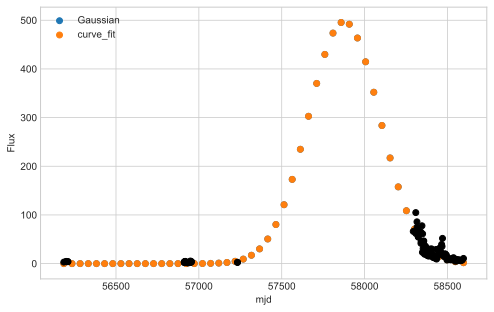

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from scipy.optimize import curve_fit
# Generate fake data
np.random.seed(0)

# Fit the data using a Gaussian

x=data_xrt_fit_NGC1566['obs_time']
y=data_xrt_fit_NGC1566['xflux']*1.0e12
x,y=select_range(x,y,56000,58600)


param_bounds=([-np.inf,57500,0],[np.inf,58500,np.inf])
popt, pcov = curve_fit(gauss_function, x, y, p0 = [100., 58000, 100],bounds=param_bounds)

print(popt)

g_init = models.Gaussian1D(amplitude=100., mean=58200, stddev=500.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')


x_new=np.linspace(min(x),max(x))
plt.scatter(x_new, g(x_new), label='Gaussian')
plt.scatter(x_new, gauss_function(x_new, *popt), label='curve_fit')

plt.xlabel('mjd')
plt.ylabel('Flux')
plt.legend(loc=2)
print(g)

In [121]:
def select_range(x,y,Tmin,Tmax):
    x_=[]
    y_=[]
    for i,j in zip(x,y):
        if i>=Tmin and i<=Tmax:
            x_.append(i)
            y_.append(j)
    return  np.array(x_),np.array(y_)       
    

In [127]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev     
    ----------------- ------------------ -----------------
    78.91899644805754 58284.063124964036 180.9291049421296


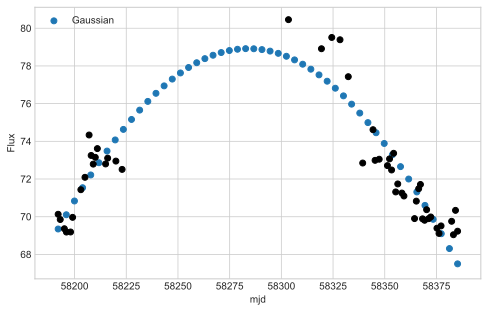

In [148]:
##### import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(0)

# Fit the data using a Gaussian


x=data_ASAS_NGC1566['hmjd']
y=data_ASAS_NGC1566['flux (mJy)']

x,y=select_range(x,y,58180,59000)



g_init = models.Gaussian1D(amplitude=80., mean=58200, stddev=100.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
x_new=np.linspace(min(x),max(x))
plt.scatter(x_new, g(x_new), label='Gaussian')

plt.xlabel('mjd')
plt.ylabel('Flux')
plt.legend(loc=2)
print(g)

In [143]:
58324-58280

44

mjd w2mpro w2sigmpro


Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    -41.1739444790036 -184110.35766760577 222573.11089033727


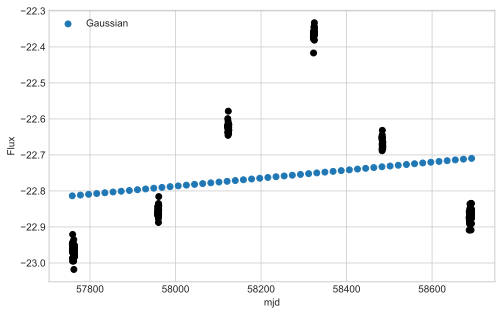

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(0)

# Fit the data using a Gaussian


for i in range(1,2):
    name_mjd='mjd'
    name_band=data_neowise_select.columns[i*2]
    name_err=data_neowise_select.columns[i*2+1]
    print(name_mjd,name_band,name_err)
    mag_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':data_neowise[name_band],'err':data_neowise[name_err]},index=None,columns=['t','flux','err'])
    dcf_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':(-48.6-data_neowise[name_band])/2.5,'err':data_neowise[name_err]/2.5},index=None,columns=['t','flux','err'])    

x=dcf_neowise_data['t']
y=dcf_neowise_data['flux']

x,y=select_range(x,y,57600,59000)

g_init = models.Gaussian1D(amplitude=-20., mean=58323, stddev=100.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)



    
    
# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')

x_new=np.linspace(min(x),max(x))
plt.scatter(x_new, g(x_new), label='Gaussian')


plt.xlabel('mjd')
plt.ylabel('Flux')
plt.legend(loc=2)
print(g)

# SED

In [ ]:

sed_ASAS_data=pd.DataFrame({'t':data_ASAS_NGC1566['hmjd'],'flux':data_ASAS_NGC1566['flux (mJy)'],'err':data_ASAS_NGC1566['flux err']},index=None,columns=['t','flux','err'])    
